# Orbital parameters (osculating and modified equinoctial)

In this example we show some simple and basic astrodynamics routines that help visualizing trajectories using
their osculating Keplerian parameters or their modified equinoctial elements. The osculating orbital parameters

In particular, in Pykep, we use the following definitions and order for the equinoctial elements (p, f, g, h, k, L):
$$
\begin{array}{l}
p = a (1-e^2) \\ 
f = e \cos(\omega + \Omega) \\
g = e \sin(\omega + \Omega) \\
h = \tan\left(i / 2\right)\cos\Omega \\
k = \tan\left(i / 2\right)\sin\Omega \\
L = \Omega + \omega + \nu
\end{array}
$$
where $a,e,i,\Omega,\omega$ are the semi-major axis, the eccentricity, the inclination, the right ascension of the ascending node and the argument of perigee, and $\nu$ is the true anomaly.

In [1]:
import pykep as pk
from math import pi

# Plotting imports
import matplotlib.pyplot as plt

Let us first generate some trajectory using a two-body propagator that uses an inertially fixed thrust.
This is just used as an example to obtain some coordinates to use. Also, note we make use of non dimensional
units so that the gravitational parameter $\mu$ is set to be 1.

In [2]:
r = [1, 0, 0]
v = [0.1, 1, 0.1]
m = 100
x = [1]; y = [0]; z=[0]
dx = [0.1]; dy = [1]; dz=[0.1]
for i in range(1500):
    # Here we are propagating a trajetory with an inertially fixed thrust
    thrust = [1,0.1,0.1]
    tof = pi/80
    r,v,m = pk.propagate_taylor(r,v,m,thrust,tof,1,1,-15,-15)
    x.append(r[0]); y.append(r[1]); z.append(r[2])
    dx.append(v[0]); dy.append(v[1]); dz.append(v[2])

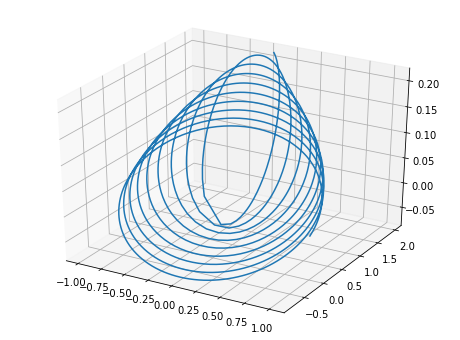

In [3]:
# We plot the trajectory
fig = plt.figure(figsize = (8,6))
axis = fig.gca(projection='3d')
plt.plot(x,y,z)

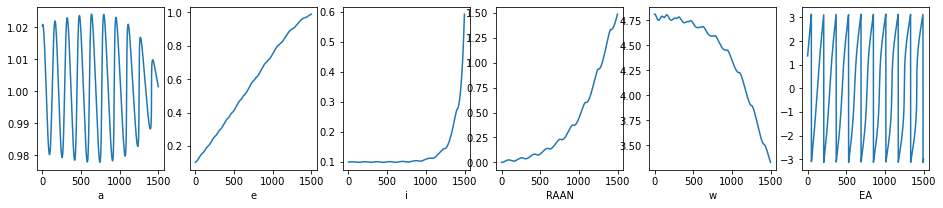

In [4]:
#We now want to visualize the change in the Keplerian osculating parameter along this trajectory. To do this
#we transform the cartesian representation of the whole trajectory into orbital parameters as follows:
fig = plt.figure(figsize = (16,3))
E = []
for i in range(1500):
    tmp = pk.ic2par(r = [x[i], y[i], z[i]], v = [dx[i], dy[i], dz[i]], mu = 1.0)
    E.append(tmp)
    labels = ['a', 'e', 'i', 'RAAN', 'w', 'EA']
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.plot([el[i] for el in E])
    plt.xlabel(labels[i])

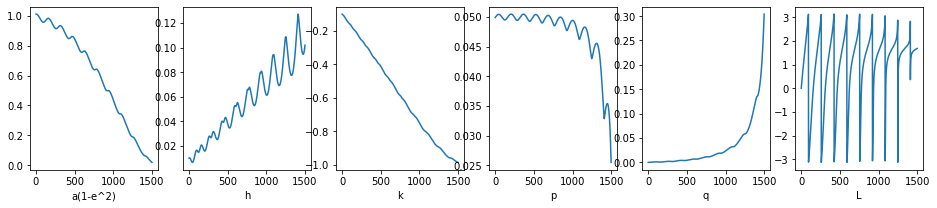

In [5]:
# In some cases (not for this particular trajectory) the Keplerian osculating parameters are not defined and the above computations would produce
# nans and infs (for example for zero eccentricity or inclination). The set of modified equinoctial elements,
# insted is always defined and guaranteed to produce real values in all cases. 
fig = plt.figure(figsize = (16,3))
EQ = []
for i in range(1500):
    tmp = pk.ic2eq(r = [x[i], y[i], z[i]], v = [dx[i], dy[i], dz[i]], mu = 1.0)
    EQ.append(tmp)
    labels = ['a(1-e^2)', 'h', 'k', 'p', 'q', 'L']
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.plot([el[i] for el in EQ])
    plt.xlabel(labels[i])